# Лабораторная работа №8

### Используемые библиотеки

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp, svm
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Исходные данные:
[`iris.data`](https://archive.ics.uci.edu/ml/datasets/iris)

## Загрузка данных

In [2]:
data = pd.read_csv('iris.data',header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
X = data.iloc[:,:4].to_numpy()
labels = data.iloc[:,4].to_numpy()

In [4]:
le = pp.LabelEncoder()
Y = le.fit_transform(labels)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

In [6]:
clf = LinearDiscriminantAnalysis()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())

3


In [7]:
print(clf.score(X, Y))

0.9733333333333334


/tmp/ipykernel_170010/256095893.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


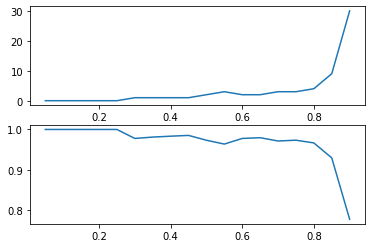

In [8]:
results_corr = []
results_score = []

for test in range(5, 95, 5):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test/100, random_state=830434)
    tr = LinearDiscriminantAnalysis()
    results_corr += [(y_test != tr.fit(X_train, y_train).predict(X_test)).sum()]
    results_score += [tr.fit(X_train, y_train).score(X_test, y_test)]

figure, axes = plt.subplots(2, 1)
axes[0].plot([index / 100 for index in range(5, 95, 5)], results_corr)
axes[1].plot([index / 100 for index in range(5, 95, 5)], results_score)
figure.show()

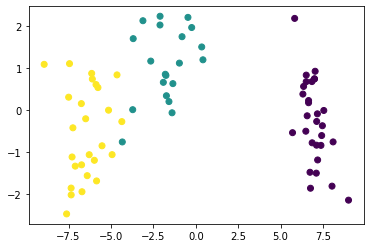

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
y_pred = LinearDiscriminantAnalysis().fit_transform(X_train, y_train)
plt.scatter([y[0] for y in y_pred], [y[1] for y in y_pred], c=y_train)
plt.show()

/tmp/ipykernel_170010/2266064149.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


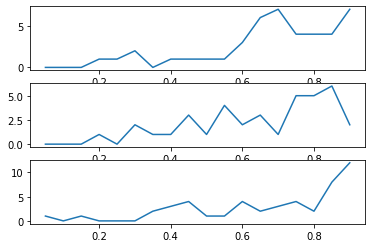

In [10]:
results = []
for solver in ('svd', 'lsqr', 'eigen'):
    met_res = []
    for test in range(5, 95, 5):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test/100)
        y_pred = LinearDiscriminantAnalysis(solver=solver).fit(X_train, y_train).predict(X_test)
        met_res += [(y_test != y_pred).sum()]
    results += [met_res]

figure, axes = plt.subplots(3, 1)
for i in range(3):
    axes[i].plot([index / 100 for index in range(5, 95, 5)], results[i])
figure.show()

/tmp/ipykernel_170010/2907423753.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


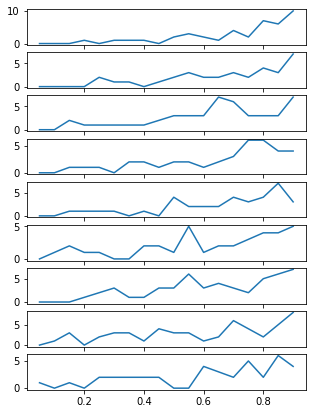

In [11]:
results = []
for shrinkage in range(9):
    met_res = []
    for test in range(5, 95, 5):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test/100)
        y_pred = LinearDiscriminantAnalysis(shrinkage=1/30*(shrinkage+1), solver='lsqr').fit(X_train, y_train).predict(X_test)
        met_res += [(y_test != y_pred).sum()]
    results += [met_res]

figure, axes = plt.subplots(9, 1, figsize=(5, 7))
for i in range(9):
    axes[i].plot([index / 100 for index in range(5, 95, 5)], results[i])
figure.show()

/tmp/ipykernel_170010/557377761.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


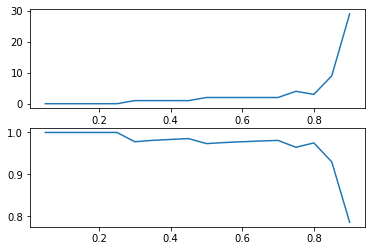

In [12]:
results_corr = []
results_score = []

for test in range(5, 95, 5):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test/100, random_state=830434)
    tr = LinearDiscriminantAnalysis(priors=[0.7, 0.15, 0.15])
    results_corr += [(y_test != tr.fit(X_train, y_train).predict(X_test)).sum()]
    results_score += [tr.fit(X_train, y_train).score(X_test, y_test)]

figure, axes = plt.subplots(2, 1)
axes[0].plot([index / 100 for index in range(5, 95, 5)], results_corr)
axes[1].plot([index / 100 for index in range(5, 95, 5)], results_score)
figure.show()

In [13]:
clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())

48


In [14]:
print(clf.score(X, Y))

0.6666666666666666


In [15]:
print(clf.support_vectors_)
print(clf.support_)
print(clf.n_support_)

[[5.1 3.3 1.7 0.5]
 [5.1 3.8 1.9 0.4]
 [5.5 2.4 3.7 1. ]
 [6.7 3.1 4.4 1.4]
 [6.7 3.  5.2 2.3]
 [6.5 3.2 5.1 2. ]
 [6.9 3.1 5.1 2.3]]
[ 6  9  4 10  3  8 12]
[2 2 3]


/tmp/ipykernel_170010/824363064.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


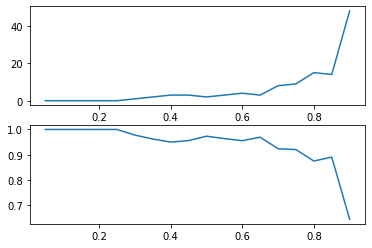

In [16]:
results_corr = []
results_score = []

for test in range(5, 95, 5):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test/100, random_state=830434)
    tr = svm.SVC()
    results_corr += [(y_test != tr.fit(X_train, y_train).predict(X_test)).sum()]
    results_score += [tr.fit(X_train, y_train).score(X_test, y_test)]

figure, axes = plt.subplots(2, 1)
axes[0].plot([index / 100 for index in range(5, 95, 5)], results_corr)
axes[1].plot([index / 100 for index in range(5, 95, 5)], results_score)
figure.show()

/tmp/ipykernel_170010/998126278.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


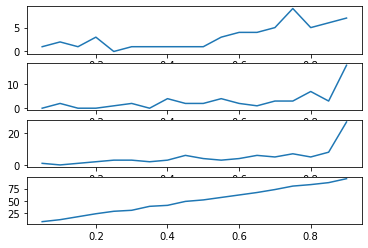

In [17]:

results = []
for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
    met_res = []
    for test in range(5, 95, 5):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test/100)
        y_pred = svm.SVC(kernel=kernel).fit(X_train, y_train).predict(X_test)
        met_res += [(y_test != y_pred).sum()]
    results += [met_res]

figure, axes = plt.subplots(4, 1)
for i in range(4):
    axes[i].plot([index / 100 for index in range(5, 95, 5)], results[i])
figure.show()

/tmp/ipykernel_170010/966351829.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


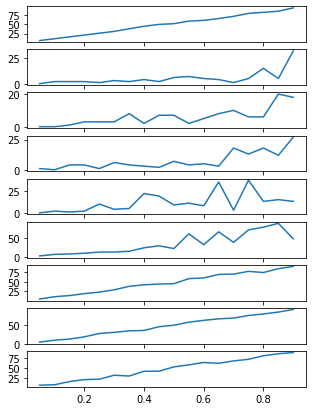

In [18]:
results = []
for degree in range(9):
    met_res = []
    for test in range(5, 95, 5):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test/100)
        y_pred = svm.SVC(kernel='poly', degree=degree*12).fit(X_train, y_train).predict(X_test)
        met_res += [(y_test != y_pred).sum()]
    results += [met_res]

figure, axes = plt.subplots(9, 1, figsize=(5, 7))
for i in range(9):
    axes[i].plot([index / 100 for index in range(5, 95, 5)], results[i])
figure.show()

/home/milty/Documents/current/sem7/ML-lab8/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/milty/Documents/current/sem7/ML-lab8/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/milty/Documents/current/sem7/ML-lab8/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/milty/Documents/current/sem7/ML-lab8/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/hom

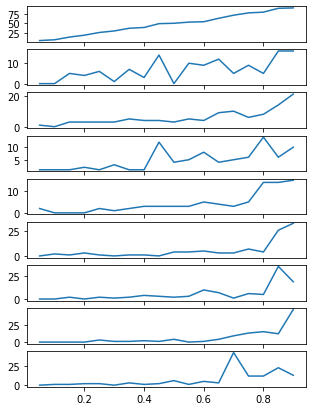

In [21]:
results = []
for iter in range(9):
    met_res = []
    for test in range(5, 95, 5):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test/100)
        y_pred = svm.SVC(max_iter=iter).fit(X_train, y_train).predict(X_test)
        met_res += [(y_test != y_pred).sum()]
    results += [met_res]

figure, axes = plt.subplots(9, 1, figsize=(5, 7))
for i in range(9):
    axes[i].plot([index / 100 for index in range(5, 95, 5)], results[i])
figure.show()

/home/milty/Documents/current/sem7/ML-lab8/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/milty/Documents/current/sem7/ML-lab8/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/milty/Documents/current/sem7/ML-lab8/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/milty/Documents/current/sem7/ML-lab8/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/milty/Documents/current/sem7/ML-lab8/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iter

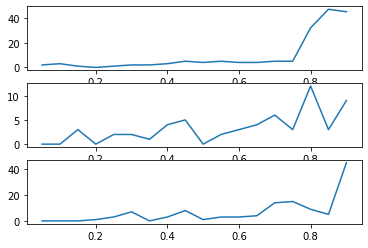

In [26]:
results = []
for method in (svm.SVC, svm.NuSVC, svm.LinearSVC):
    met_res = []
    for test in range(5, 95, 5):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test/100)
        y_pred = method().fit(X_train, y_train).predict(X_test)
        met_res += [(y_test != y_pred).sum()]
    results += [met_res]

figure, axes = plt.subplots(3, 1)
for i in range(3):
    axes[i].plot([index / 100 for index in range(5, 95, 5)], results[i])
figure.show()